#### Clasificación multiclase con deep learning: reconocimiento y clasificación de imágenes
Utilizamos el conjunto de entrenamiento fashion_mnist incluido en keras.
El dataset contiene 60.000 imágenes de prendas de vestir (28x28 en escala de grises). Y 10.000 imágenes para test. 
Las categorías con su etiqueta son las siguientes:
* 0 	T-shirt/top
* 1 	Trouser
* 2 	Pullover
* 3 	Dress
* 4 	Coat
* 5 	Sandal
* 6 	Shirt
* 7 	Sneaker
* 8 	Bag
* 9 	Ankle boot

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
/home/alberto/dev/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alberto/dev/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alberto/dev/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alberto/dev/envs/ml/lib/python3.6/site-pa

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap="gray")
plt.show()

<Figure size 640x480 with 1 Axes>

Para realizar la clasificación vamos a usar una red neuronal. Como las imágenes son de 28x28 necesitamos 784 entradas en nustra red (28x28=784). A cada pixel le corresponde una entrada en la red, así que lo primero que tenemos que hacer es adaptar las imágenes a un formato más manejable.
* Transformamos cada imagen de una matriz de de 28x28 en un vector de tamaño 784.
* Cada pixel es un entero en el rango 0-255. Lo vamos a normalizar para que cada pixel sea un número real que esté en el rango 0-1.

También vamos a transformar las etiquetas de números enteros a un vector binario, que es más conveniente a la hora de entrenar la red. Esto lo hacemos con la función ```to_categorical``` de keras.

In [3]:
from keras.utils import to_categorical

x_train = x_train.reshape((60000, 784))
x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train)

x_test = x_test.reshape((10000, 784))
x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test)

Vamos a separar 10.000 ejemplos del conjunto de entrenamiento para crear un conjunto de validación.

In [4]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

In [5]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(784,))) # 28x28=784
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

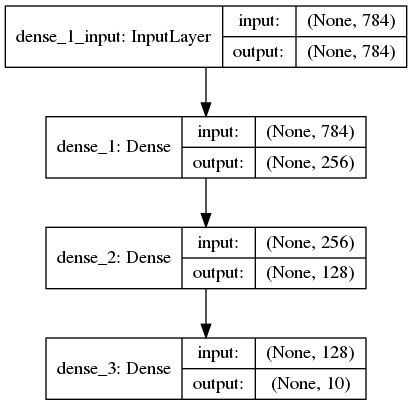

In [6]:
# visualizar modelo

from keras.utils import plot_model
plot_model(model, show_shapes=True)

Compilamos el modelo

In [7]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Realizamos el entrenamiento

In [8]:
train_log = model.fit(x_train, y_train, 
                      epochs=8, batch_size=128,
                     validation_data=(x_val, y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 1s 17us/step - loss: 0.5656 - accuracy: 0.7951 - val_loss: 0.5316 - val_accuracy: 0.7986
Epoch 2/8
50000/50000 [==============================] - 1s 15us/step - loss: 0.3926 - accuracy: 0.8556 - val_loss: 0.3797 - val_accuracy: 0.8640
Epoch 3/8
50000/50000 [==============================] - 1s 15us/step - loss: 0.3480 - accuracy: 0.8722 - val_loss: 0.3682 - val_accuracy: 0.8612
Epoch 4/8
50000/50000 [==============================] - 1s 15us/step - loss: 0.3179 - accuracy: 0.8820 - val_loss: 0.3584 - val_accuracy: 0.8707
Epoch 5/8
50000/50000 [==============================] - 1s 15us/step - loss: 0.2974 - accuracy: 0.8896 - val_loss: 0.4230 - val_accuracy: 0.8557
Epoch 6/8
50000/50000 [==============================] - 1s 15us/step - loss: 0.2816 - accuracy: 0.8949 - val_loss: 0.3384 - val_accuracy: 0.8758
Epoch 7/8
50000/50000 [==============================] - 1s 15us/step - l

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 0s 12us/step
0.8809999823570251


In [10]:
predictions = model.predict(x_test)
np.argmax(predictions[0]) # clase más probable

9

Obtenemos la gráfica de la función de coste. Tanto del conjunto de entrenamiento como del conjunto de validación.

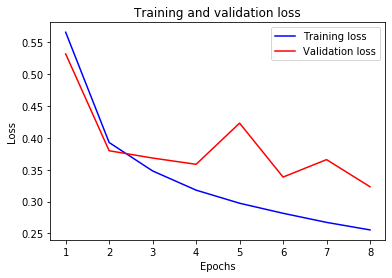

In [11]:
# grafica con la función de coste

loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Otenemos la gráfica con la exactitud de las predicciones sobre el conjunto de entrenamiento y validación.

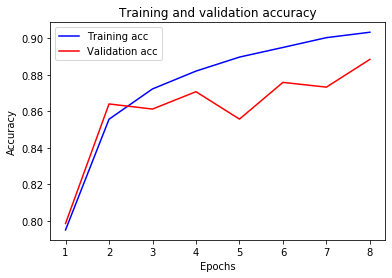

In [12]:
# grafica de la exactitud

plt.clf()
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()